I was in a work meeting one day when they were going over crime statistics for our area of the city. I thought it would be great to make some nice visualizations and really dive into it! I found the datasets at the website below and hope you enjoy!

In [1]:
# data from: https://opendataphilly.org/datasets/crime-incidents/

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as display

In [3]:
Crime = pd.read_csv('../../Fun_Projects/PhillyCrime/incidents_part1_part2 (1).csv')

In [4]:
Crime.head()

,the_geom,cartodb_id,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,0101000020E610000072F4002F56C052C0E231EAF7D008...,3101327,0101000020110F0000E02A0AD8DAD95FC10AAD7018AD99...,14989322,8,2,2024-03-29 07:16:00+00,2024-03-29,03:16:00,3.0,2.024080e+11,3300 BLOCK GRANT AV,600,Thefts,-75.005260,40.068877,40.068877,-75.005260
1,NaN,3119765,NaN,12132410,9,2,2024-01-01 05:08:00+00,2024-01-01,00:08:00,0.0,2.024090e+11,200 BLOCK N 18TH ST,600,Thefts,NaN,NaN,NaN,NaN
2,0101000020E610000085B88B93AFC852C0A37D079A2A00...,3124760,0101000020110F00006DE0A96B09E85FC168A254CD1490...,16307799,25,3,2024-04-15 15:05:00+00,2024-04-15,11:05:00,11.0,2.024250e+11,3300 BLOCK N 3RD ST,600,Thefts,-75.135716,40.001300,40.001300,-75.135716
3,0101000020E6100000C3D02C01DFCA52C0EAF6E50E13FF...,3125028,0101000020110F00001B9E6CAABFEB5FC1833EF6E3DE8E...,13562561,22,2,2024-02-14 13:25:00+00,2024-02-14,08:25:00,8.0,2.024220e+11,2500 BLOCK N 23RD ST,600,Thefts,-75.169861,39.992769,39.992769,-75.169861
4,0101000020E61000006A7DDB5DF1CE52C0E7687ECAEBF4...,3126313,0101000020110F0000152BF838AAF25FC1227C8E1A9F83...,13222769,12,1,2024-01-05 17:50:00+00,2024-01-05,12:50:00,12.0,2.024120e+11,2900 BLOCK S 70TH ST,600,Thefts,-75.233482,39.913446,39.913446,-75.233482


In [5]:
Crime.isnull().sum()

the_geom                4873
cartodb_id                 0
the_geom_webmercator    4913
objectid                   0
dc_dist                    0
psa                       30
dispatch_date_time         0
dispatch_date              0
dispatch_time              0
hour                       2
dc_key                     0
location_block            16
ucr_general                0
text_general_code          0
point_x                 4913
point_y                 4913
lat                     4913
lng                     4913
dtype: int64

In [6]:
# renaming some columns
Crime.rename(columns={"text_general_code": "Type_of_Crime", "dispatch_date_time": "DateTime"}, inplace=True)

In [7]:
Crime.head()

,the_geom,cartodb_id,the_geom_webmercator,objectid,dc_dist,psa,DateTime,dispatch_date,dispatch_time,hour,dc_key,location_block,ucr_general,Type_of_Crime,point_x,point_y,lat,lng
0,0101000020E610000072F4002F56C052C0E231EAF7D008...,3101327,0101000020110F0000E02A0AD8DAD95FC10AAD7018AD99...,14989322,8,2,2024-03-29 07:16:00+00,2024-03-29,03:16:00,3.0,2.024080e+11,3300 BLOCK GRANT AV,600,Thefts,-75.005260,40.068877,40.068877,-75.005260
1,NaN,3119765,NaN,12132410,9,2,2024-01-01 05:08:00+00,2024-01-01,00:08:00,0.0,2.024090e+11,200 BLOCK N 18TH ST,600,Thefts,NaN,NaN,NaN,NaN
2,0101000020E610000085B88B93AFC852C0A37D079A2A00...,3124760,0101000020110F00006DE0A96B09E85FC168A254CD1490...,16307799,25,3,2024-04-15 15:05:00+00,2024-04-15,11:05:00,11.0,2.024250e+11,3300 BLOCK N 3RD ST,600,Thefts,-75.135716,40.001300,40.001300,-75.135716
3,0101000020E6100000C3D02C01DFCA52C0EAF6E50E13FF...,3125028,0101000020110F00001B9E6CAABFEB5FC1833EF6E3DE8E...,13562561,22,2,2024-02-14 13:25:00+00,2024-02-14,08:25:00,8.0,2.024220e+11,2500 BLOCK N 23RD ST,600,Thefts,-75.169861,39.992769,39.992769,-75.169861
4,0101000020E61000006A7DDB5DF1CE52C0E7687ECAEBF4...,3126313,0101000020110F0000152BF838AAF25FC1227C8E1A9F83...,13222769,12,1,2024-01-05 17:50:00+00,2024-01-05,12:50:00,12.0,2.024120e+11,2900 BLOCK S 70TH ST,600,Thefts,-75.233482,39.913446,39.913446,-75.233482


In [8]:
Crime.dtypes

the_geom                 object
cartodb_id                int64
the_geom_webmercator     object
objectid                  int64
dc_dist                   int64
psa                      object
DateTime                 object
dispatch_date            object
dispatch_time            object
hour                    float64
dc_key                  float64
location_block           object
ucr_general               int64
Type_of_Crime            object
point_x                 float64
point_y                 float64
lat                     float64
lng                     float64
dtype: object

In [9]:
Crime.Type_of_Crime.value_counts()

Thefts                                     18007
Other Assaults                             12443
All Other Offenses                          6607
Vandalism/Criminal Mischief                 6340
Motor Vehicle Theft                         6266
Theft from Vehicle                          4827
Fraud                                       3569
Aggravated Assault No Firearm               2412
Burglary Residential                        1560
Narcotic / Drug Law Violations              1425
Aggravated Assault Firearm                  1295
Weapon Violations                           1254
Robbery No Firearm                          1139
Robbery Firearm                              726
Burglary Non-Residential                     717
Receiving Stolen Property                    540
Other Sex Offenses (Not Commercialized)      497
DRIVING UNDER THE INFLUENCE                  398
Arson                                        330
Rape                                         230
Offenses Against Fam

<AxesSubplot:>

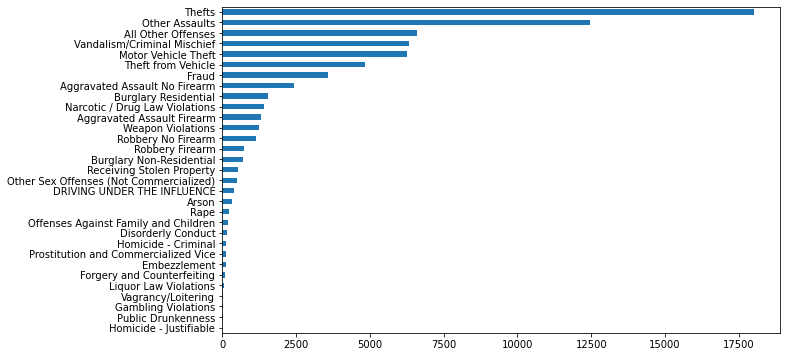

In [10]:
plt.figure(figsize=(10, 6))
Crime['Type_of_Crime'].value_counts().sort_values(ascending=True).plot(kind='barh')


In [11]:
# Looks like theft is the most common crime, followed by assaults.

In [12]:
# I do this often, when I want to make manipulations without having to reload or change my variables if I make
# a mistake. This let's me just revert back to the original loaded data easily if need be.
Crime2 = Crime

In [13]:
Crime2.shape

(71453, 18)

In [14]:
Crime2['datetime'] = pd.to_datetime(Crime['DateTime'])

In [15]:
Crime2.dtypes

the_geom                             object
cartodb_id                            int64
the_geom_webmercator                 object
objectid                              int64
dc_dist                               int64
psa                                  object
DateTime                             object
dispatch_date                        object
dispatch_time                        object
hour                                float64
dc_key                              float64
location_block                       object
ucr_general                           int64
Type_of_Crime                        object
point_x                             float64
point_y                             float64
lat                                 float64
lng                                 float64
datetime                datetime64[ns, UTC]
dtype: object

In [16]:
Crime2.head()

,the_geom,cartodb_id,the_geom_webmercator,objectid,dc_dist,psa,DateTime,dispatch_date,dispatch_time,hour,dc_key,location_block,ucr_general,Type_of_Crime,point_x,point_y,lat,lng,datetime
0,0101000020E610000072F4002F56C052C0E231EAF7D008...,3101327,0101000020110F0000E02A0AD8DAD95FC10AAD7018AD99...,14989322,8,2,2024-03-29 07:16:00+00,2024-03-29,03:16:00,3.0,2.024080e+11,3300 BLOCK GRANT AV,600,Thefts,-75.005260,40.068877,40.068877,-75.005260,2024-03-29 07:16:00+00:00
1,NaN,3119765,NaN,12132410,9,2,2024-01-01 05:08:00+00,2024-01-01,00:08:00,0.0,2.024090e+11,200 BLOCK N 18TH ST,600,Thefts,NaN,NaN,NaN,NaN,2024-01-01 05:08:00+00:00
2,0101000020E610000085B88B93AFC852C0A37D079A2A00...,3124760,0101000020110F00006DE0A96B09E85FC168A254CD1490...,16307799,25,3,2024-04-15 15:05:00+00,2024-04-15,11:05:00,11.0,2.024250e+11,3300 BLOCK N 3RD ST,600,Thefts,-75.135716,40.001300,40.001300,-75.135716,2024-04-15 15:05:00+00:00
3,0101000020E6100000C3D02C01DFCA52C0EAF6E50E13FF...,3125028,0101000020110F00001B9E6CAABFEB5FC1833EF6E3DE8E...,13562561,22,2,2024-02-14 13:25:00+00,2024-02-14,08:25:00,8.0,2.024220e+11,2500 BLOCK N 23RD ST,600,Thefts,-75.169861,39.992769,39.992769,-75.169861,2024-02-14 13:25:00+00:00
4,0101000020E61000006A7DDB5DF1CE52C0E7687ECAEBF4...,3126313,0101000020110F0000152BF838AAF25FC1227C8E1A9F83...,13222769,12,1,2024-01-05 17:50:00+00,2024-01-05,12:50:00,12.0,2.024120e+11,2900 BLOCK S 70TH ST,600,Thefts,-75.233482,39.913446,39.913446,-75.233482,2024-01-05 17:50:00+00:00


In [17]:
Crime2.set_index('datetime', inplace=True)

In [18]:
pivot_table = Crime2.groupby([Crime2.index.date, 'Type_of_Crime']).size().unstack(fill_value=0)

### The pivot table counts the occurrences of each kind of crime per day.

In [19]:
pd.set_option('display.max_columns', None)

In [20]:
pivot_table

Type_of_Crime,Aggravated Assault Firearm,Aggravated Assault No Firearm,All Other Offenses,Arson,Burglary Non-Residential,Burglary Residential,DRIVING UNDER THE INFLUENCE,Disorderly Conduct,Embezzlement,Forgery and Counterfeiting,Fraud,Gambling Violations,Homicide - Criminal,Homicide - Justifiable,Liquor Law Violations,Motor Vehicle Theft,Narcotic / Drug Law Violations,Offenses Against Family and Children,Other Assaults,Other Sex Offenses (Not Commercialized),Prostitution and Commercialized Vice,Public Drunkenness,Rape,Receiving Stolen Property,Robbery Firearm,Robbery No Firearm,Theft from Vehicle,Thefts,Vagrancy/Loitering,Vandalism/Criminal Mischief,Weapon Violations
2024-01-01,8,23,25,3,5,9,2,1,0,1,7,0,0,0,0,35,2,1,75,0,0,1,0,1,5,11,21,66,0,60,19
2024-01-02,6,22,28,2,6,5,1,0,0,0,20,0,1,0,0,61,6,1,80,3,0,0,2,2,6,4,42,105,0,45,8
2024-01-03,10,15,48,0,7,12,1,1,2,1,16,0,0,0,0,39,13,1,67,4,0,0,2,7,8,5,34,106,0,41,6
2024-01-04,8,13,38,3,7,10,2,1,0,1,31,0,2,0,0,33,16,0,66,1,2,0,1,3,9,16,29,109,0,32,11
2024-01-05,5,16,40,0,6,13,3,0,0,3,29,0,3,0,0,50,18,3,68,1,4,0,2,4,4,7,18,88,0,26,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-13,9,14,46,1,4,7,1,2,3,0,31,0,0,0,0,50,13,1,89,0,1,0,3,0,4,13,34,127,0,44,10
2024-06-14,10,18,48,3,3,9,1,1,1,0,18,0,1,0,0,36,8,2,79,4,0,0,0,3,4,9,44,130,0,28,9
2024-06-15,8,17,9,2,1,7,4,0,0,0,11,0,0,0,1,47,5,0,65,2,0,0,1,3,3,6,44,106,0,43,9
2024-06-16,14,19,36,2,2,7,3,0,0,0,8,0,0,0,1,39,4,0,68,0,0,0,1,1,2,8,28,89,0,47,9


Text(0, 0.5, 'Number of Crimes')

<Figure size 1008x504 with 0 Axes>

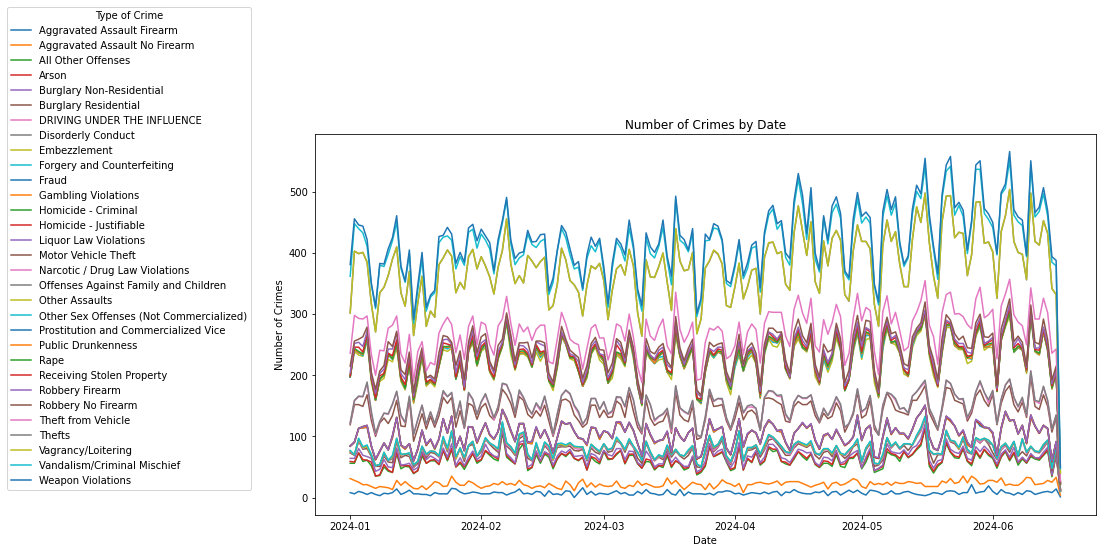

In [21]:
plt.figure(figsize=(14, 7))
pivot_table.plot(kind='line', stacked=True, figsize=(14, 7))
plt.legend(loc='center left', bbox_to_anchor=(-0.4, 0.7), title="Type of Crime")
plt.title('Number of Crimes by Date')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')

### That graph is quite crowded! Let's group the crimes by the month so it is easier to read:

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
pivot_table2 = Crime2.groupby([Crime2.index.to_period('M'), 'Type_of_Crime']).size().unstack(fill_value=0)

In [24]:
pivot_table2

Type_of_Crime,Aggravated Assault Firearm,Aggravated Assault No Firearm,All Other Offenses,Arson,Burglary Non-Residential,Burglary Residential,DRIVING UNDER THE INFLUENCE,Disorderly Conduct,Embezzlement,Forgery and Counterfeiting,Fraud,Gambling Violations,Homicide - Criminal,Homicide - Justifiable,Liquor Law Violations,Motor Vehicle Theft,Narcotic / Drug Law Violations,Offenses Against Family and Children,Other Assaults,Other Sex Offenses (Not Commercialized),Prostitution and Commercialized Vice,Public Drunkenness,Rape,Receiving Stolen Property,Robbery Firearm,Robbery No Firearm,Theft from Vehicle,Thefts,Vagrancy/Loitering,Vandalism/Criminal Mischief,Weapon Violations
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01,232,422,1063,55,160,284,67,16,25,17,589,0,23,1,5,1187,308,35,2036,86,13,1,39,111,191,198,761,3014,1,1067,228
2024-02,213,372,1293,60,107,265,65,40,16,23,628,0,26,0,7,993,286,34,2092,80,17,0,31,83,139,179,695,2930,0,1050,200
2024-03,224,419,1178,49,123,284,75,29,24,10,670,0,19,0,8,1052,264,38,2147,89,19,3,44,108,115,183,830,3100,4,1065,219
2024-04,233,442,1182,57,137,297,76,33,14,18,618,7,19,0,10,1097,223,33,2303,93,35,7,52,103,107,224,981,3220,9,1163,230
2024-05,258,479,1298,75,149,301,63,31,18,10,622,9,19,0,13,1250,224,33,2584,111,26,4,49,83,113,237,987,3828,1,1243,255
2024-06,135,278,593,34,41,129,52,15,11,1,442,0,14,0,5,687,120,14,1281,38,7,0,15,52,61,118,573,1915,1,752,122


Text(0, 0.5, 'Number of Crimes')

<Figure size 1008x504 with 0 Axes>

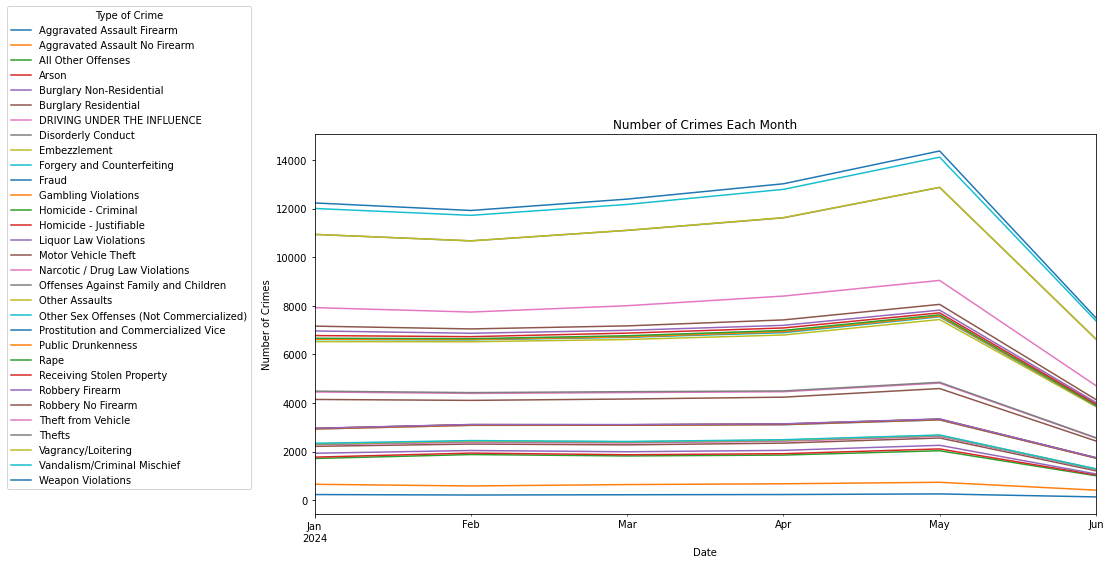

In [25]:
plt.figure(figsize=(14, 7))
pivot_table2.plot(kind='line', stacked=True, figsize=(14, 7))
plt.legend(loc='center left', bbox_to_anchor=(-0.4, 0.7), title="Type of Crime")
plt.title('Number of Crimes Each Month')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')

In [26]:
Crime2.reset_index(inplace=True)

In [27]:
Crime2['MonthYear'] = Crime2['datetime'].dt.to_period('M')

In [28]:
DatesPerMonth = Crime2.groupby('MonthYear')['datetime'].nunique()

In [29]:
DatesPerMonth

MonthYear
2024-01    10149
2024-02     9853
2024-03    10304
2024-04    10767
2024-05    11611
2024-06     6137
Freq: M, Name: datetime, dtype: int64

In [30]:
January = Crime2[Crime2['datetime'].dt.month == 1]
DaysInJanuary = sorted(January['datetime'].dt.day.unique())
print(f"Days recorded in January: {DaysInJanuary}")

Days recorded in January: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [31]:
February = Crime2[Crime2['datetime'].dt.month == 2]
DaysInFebruary = sorted(February['datetime'].dt.day.unique())
print(f"Days recorded in February: {DaysInFebruary}")

Days recorded in February: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [32]:
# ^^YAY^^leap year!

In [33]:
March = Crime2[Crime2['datetime'].dt.month == 3]
DaysInMarch = sorted(March['datetime'].dt.day.unique())
print(f"Days recorded in March: {DaysInMarch}")

Days recorded in March: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [34]:
April = Crime2[Crime2['datetime'].dt.month == 4]
DaysInApril = sorted(April['datetime'].dt.day.unique())
print(f"Days recorded in April: {DaysInApril}")

Days recorded in April: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [35]:
May = Crime2[Crime2['datetime'].dt.month == 5]
DaysInMay = sorted(May['datetime'].dt.day.unique())
print(f"Days recorded in May: {DaysInMay}")

Days recorded in May: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


### Let's see what is going on with June as it dropped dramatically.

In [36]:
June = Crime2[Crime2['datetime'].dt.month == 6]
DaysInJune = sorted(June['datetime'].dt.day.unique())
print(f"Days recorded in June: {DaysInJune}")

Days recorded in June: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


### We can also put this all in a table to view the months together

In [37]:
data = []

# for loop to go through the data for each month and see the days recorded:
for period, group in Crime2.groupby('MonthYear'):
    days = sorted(group['datetime'].dt.day.unique())
    data.append([period, days])

# Making a DataFrame for the table:
table = pd.DataFrame(data, columns=['Month', 'Days Recorded'])

# Converting the list of days to a string form
table['Days Recorded'] = table['Days Recorded'].apply(lambda x: ', '.join(map(str, x)))

# Want to show all the days listed out
pd.set_option('display.max_colwidth', None)  
display.display(table) 

,Month,Days Recorded
0,2024-01,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31"
1,2024-02,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29"
2,2024-03,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31"
3,2024-04,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30"
4,2024-05,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31"
5,2024-06,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17"


 Here we can see one of the reasons the data in the graph dropped off in June was because only a little over half of the month was recorded. This is really important to explore when data shows a trend. It would be easy to look at that graph with no explanation and think the crime dropped in June. But that would not be correctly interpretting the data. After we investigated a little bit, we can see that it dropped because only half the amount of days were recorded in June compared to the other months. It is important to always try to display the facts and not display data in a skewed way where misinterpretations can occur.

### Let's look at the time of day crimes are occurring.

In [38]:
Crime2.dtypes

datetime                datetime64[ns, UTC]
the_geom                             object
cartodb_id                            int64
the_geom_webmercator                 object
objectid                              int64
dc_dist                               int64
psa                                  object
DateTime                             object
dispatch_date                        object
dispatch_time                        object
hour                                float64
dc_key                              float64
location_block                       object
ucr_general                           int64
Type_of_Crime                        object
point_x                             float64
point_y                             float64
lat                                 float64
lng                                 float64
MonthYear                         period[M]
dtype: object

In [39]:
Crime2.hour.isnull().sum()

2

In [40]:
# Dropping our NA values

In [41]:
Crime2.hour.dropna(inplace=True)

In [42]:
Crime2.hour.isnull().sum()

2

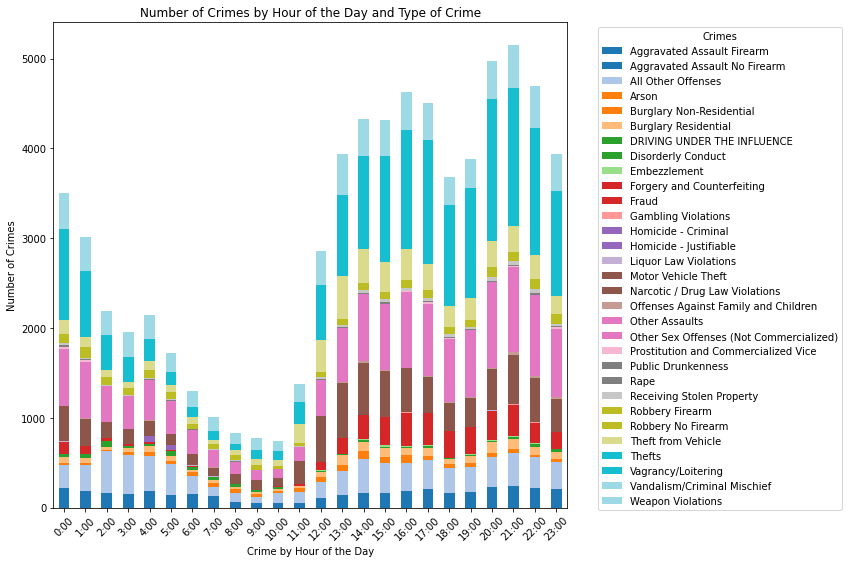

In [43]:
Crime2['hour'] = Crime2['datetime'].dt.hour
HourlyCrimeCount = Crime2.groupby(['hour', 'Type_of_Crime']).size().unstack(fill_value=0)

# Stacked Bar Chart
Plot = HourlyCrimeCount.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.xlabel('Crime by Hour of the Day')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Hour of the Day and Type of Crime')
plt.legend(title='Crimes', bbox_to_anchor=(1.05, 1), loc='upper left')
#Below is taking the time of day, specifying the hours and the range of time for the graph
plt.xticks(range(0, 24), [f'{hour}:00' for hour in range(0, 24)], rotation=45)
plt.tight_layout()
plt.show()

This is probably not too shocking, that most crimes take place at night.

I am going to add to this little project, I downloaded 2023 data and will review that as well soon! Hope you enjoyed this so far :) Best! - Maria